# (Simplified) Bayesian Thompson Sampling for Tabular MDP

In this Jupyter Notebook, we will code four variants of BTS with Gaussian linear model for MDP

1. Bayesian Thompson Sampling that ignores any delayed effects
2. Bayesian Thompson Sampling V2 (with exact posterior probability computation) that ignored delayed effects
3. Bayesian Thompson Sampling H that incorporates delayed effects (assumes perfect knowledge of delayed effects H)
3. Bayesian Thompson Sampling H V2 (with exact posterior probability computation) that incorporates delayed effects (assumes perfect knowledge of delayed effects H)



## Environment Setup and Imports

Let's start by importing the required libraries and setting up the environment.


In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# Define utility functions
def pplot(ax=None):
    if ax is None:
        plt.grid(True, alpha=0.5)
        axoff(plt.gca())
    else:
        ax.grid(True, alpha=0.5)
        axoff(ax)
    return

def axoff(ax, keys=['top', 'right']):
    for k in keys:
        ax.spines[k].set_visible(False)
    return

## Tabular MDP Environment and Thompson Sampling Algorithm Classes

Next, let's define the MDP class and the classes for different variants of BTS.


In [2]:
class MDPEnvironment:
    def __init__(self, num_actions, num_states, true_rewards, transition_matrix):
        self.num_actions = num_actions
        self.num_states = num_states
        self.true_rewards = true_rewards
        self.transition_matrix = transition_matrix

    def transition(self, state, action):
        next_state = np.random.choice(self.num_states, p=self.transition_matrix[state, :, action])
        reward = self.true_rewards[next_state] + np.random.randn()
        return next_state, reward


#### %%%%%%% YOU WILL EDIT THIS CELL AT SOME POINT %%%%%%% 

In [3]:
class BayesianThompsonSampling:
    def __init__(self, num_actions, num_states, prior_means, prior_variances, reward_variance):
        self.num_actions = num_actions
        self.prior_means = prior_means
        self.prior_variances = prior_variances
        self.reward_variance = reward_variance
    
    ## %%%%%%% EXERCISE 1-----YOU WILL WRITE CODE HERE %%%%%%% 
    def select_action(self, state):
        ''' IMPLEMENT THIS CODE to select arm in Thompson sampling. 
        This part uses ONLY rewards and NO KNOWELDGE OF HStar / DELAYED EFFECTS.
        Your code should involve generating some random variables directly and taking some maxima.
        Your code should return the sampled arm.'''
    ## %%%%%%% UNTIL HERE %%%%%%% 

    def update(self, state, action, reward):
        posterior_precision = 1.0 / self.prior_variances[state, action] + 1.0 / self.reward_variance
        posterior_mean = (self.prior_means[state, action] / self.prior_variances[state, action] + reward / self.reward_variance) / posterior_precision
        self.prior_means[state, action] = posterior_mean
        self.prior_variances[state, action] = 1.0 / posterior_precision



class BayesianThompsonSamplingH:
    def __init__(self, num_actions, num_states, prior_means, prior_variances, reward_variance):
        self.num_actions = num_actions
        self.prior_means = prior_means
        self.prior_variances = prior_variances
        self.reward_variance = reward_variance
    
    ## %%%%%%% EXERCISE 2-----YOU WILL WRITE CODE HERE %%%%%%% 
    def select_action(self, state):
        ''' IMPLEMENT THIS CODE to select arm in Thompson sampling. 
        This part uses BOTH rewards and PERFECT KNOWELDGE OF HStar / DELAYED EFFECTS.'''
    ## %%%%%%% UNTIL HERE %%%%%%% 

    def update(self, state, action, reward):
        posterior_precision = 1.0 / self.prior_variances[state, action] + 1.0 / self.reward_variance
        posterior_mean = (self.prior_means[state, action] / self.prior_variances[state, action] + reward / self.reward_variance) / posterior_precision
        self.prior_means[state, action] = posterior_mean
        self.prior_variances[state, action] = 1.0 / posterior_precision


class BayesianThompsonSamplingV2:
    def __init__(self, num_actions, num_states, prior_means, prior_variances, reward_variance):
        self.num_actions = num_actions
        self.prior_means = prior_means
        self.prior_variances = prior_variances
        self.reward_variance = reward_variance
    
    ## %%%%%%% EXERCISE 3-----YOU WILL WRITE CODE HERE %%%%%%% 
    def select_action(self, state):
        ''' IMPLEMENT THIS CODE. Your code should involve computing some probability and then generating
       the arm directly. Your code should return the probability of sampling arm 1, and the sampled arm.
        This part uses ONLY rewards and NO KNOWELDGE OF HStar / DELAYED EFFECTS.
       '''
    ## %%%%%%% UNTIL HERE %%%%%%% 

    def update(self, state, action, reward):
        posterior_precision = 1.0 / self.prior_variances[state, action] + 1.0 / self.reward_variance
        posterior_mean = (self.prior_means[state, action] / self.prior_variances[state, action] + reward / self.reward_variance) / posterior_precision
        self.prior_means[state, action] = posterior_mean
        self.prior_variances[state, action] = 1.0 / posterior_precision


class BayesianThompsonSamplingHV2:
    def __init__(self, num_actions, num_states, prior_means, prior_variances, reward_variance):
        self.num_actions = num_actions
        self.prior_means = prior_means
        self.prior_variances = prior_variances
        self.reward_variance = reward_variance
    
    ## %%%%%%% EXERCISE 4-----YOU WILL WRITE CODE HERE %%%%%%% 
    def select_action(self, state):
        ''' IMPLEMENT THIS CODE. Your code should involve computing some probability and then generating
       the arm directly. Your code should return the probability of sampling arm 1, and the sampled arm.
        his part uses BOTH rewards and PERFECT KNOWELDGE OF HStar / DELAYED EFFECTS.'''
    ## %%%%%%% UNTIL HERE %%%%%%% 

    def update(self, state, action, reward):
        posterior_precision = 1.0 / self.prior_variances[state, action] + 1.0 / self.reward_variance
        posterior_mean = (self.prior_means[state, action] / self.prior_variances[state, action] + reward / self.reward_variance) / posterior_precision
        self.prior_means[state, action] = posterior_mean
        self.prior_variances[state, action] = 1.0 / posterior_precision


## Algorithm Comparison

Now, let's compare the performance of different algorithms in the bandit environment.


#### %%%%%%% YOU WILL EDIT THIS CELL AT SOME POINT %%%%%%% 

In [4]:
np.random.seed(0) ### TRY 0, 10, 5

EVAL_BTS = False # CHANGE THIS TO True when you finish EXERCISE 1 / Editing BTS code.
EVAL_BTSH = False # CHANGE THIS TO True when you finish EXERCISE 2 / Editing BTSH code.
EVAL_BTSV2 = False # CHANGE THIS TO True when you finish EXERCISE 3 / Editing BTSV2 code.
EVAL_BTSHV2 = False # CHANGE THIS TO True when you finish EXERCISE 4 / Editing BTSHV2 code.


### Parameters

In [5]:
NUM_ACTIONS = 2
NUM_STATES = 3
NOISE_STD = 3.  # (Gaussian) noise std in rewards
NOISE_STD_EST = 3.
TRUE_REWARDS = np.array([0, 1, 10])

gamma = 0.95

delta = 0.2

TRANSITION_MATRIX = np.empty([NUM_STATES, NUM_STATES, NUM_ACTIONS])
TRANSITION_MATRIX[0, :, 0] = np.array([1-delta, 0, delta])
TRANSITION_MATRIX[1, :, 0] = np.array([1, 0, 0])
TRANSITION_MATRIX[2, :, 0] = np.array([1, 0, 0])
TRANSITION_MATRIX[0, :, 1] = np.array([0, 1, 0])
TRANSITION_MATRIX[1, :, 1] = np.array([0, 1, 0])
TRANSITION_MATRIX[2, :, 1] = np.array([0, 0, 1])

TRUE_REWARD_MATRIX = np.array([[10*delta, 1], [0, 1], [0, 10]])
ALPHA = 10*delta * (1+gamma) / (1-gamma*(1-delta))
VSTAR = [166.66666667, 158.33333333, 200.]
HSTAR = np.empty([NUM_STATES, NUM_ACTIONS])
HSTAR[0, :] = np.array([(1-delta)*VSTAR[0] + delta*VSTAR[2], VSTAR[1]])
HSTAR[1, :] = np.array([VSTAR[0], VSTAR[1]])
HSTAR[2, :] = [VSTAR[0], VSTAR[2]]


num_actions = NUM_ACTIONS
num_states = NUM_STATES
true_rewards = TRUE_REWARDS
transition_matrix = TRANSITION_MATRIX

num_rounds = 50
prior_means = np.zeros((num_states, num_actions))
prior_variances = np.ones((num_states, num_actions))
reward_variance = NOISE_STD_EST**2  #* np.ones(num_actions)


### Create MDP environment and algs


In [6]:

mdp_env = MDPEnvironment(num_actions=num_actions, num_states=num_states, true_rewards=true_rewards, 
                         transition_matrix=transition_matrix)


algs = []
if EVAL_BTS:
    bts = BayesianThompsonSampling(num_actions, num_states, prior_means, prior_variances, reward_variance)
    algs.append(('Bayesian Thompson Sampling', bts))
if EVAL_BTSV2:
    bts2 = BayesianThompsonSamplingV2(num_actions, num_states, prior_means, prior_variances, reward_variance)
    algs.append(('Bayesian Thompson Sampling V2', bts2))
    p_bts2 = np.zeros(num_rounds)  # posterior probs
if EVAL_BTSH:
    btsH = BayesianThompsonSamplingH(num_actions, num_states, prior_means, prior_variances, reward_variance)
    algs.append(('Bayesian Thompson Sampling with HStar', btsH))
if EVAL_BTSHV2:
    btsH2 = BayesianThompsonSamplingHV2(num_actions, num_states, prior_means, prior_variances, reward_variance)
    algs.append(('Bayesian Thompson Sampling with HStar V2', btsH2))
    p_btsH2 = np.zeros(num_rounds)  # posterior probs

In [7]:
# Create a list of algorithms
algs = []
if EVAL_BTS:
    bts = BayesianThompsonSampling(num_actions, num_states, prior_means, prior_variances, reward_variance)
    algs.append(('Bayesian Thompson Sampling', bts))
if EVAL_BTSV2:
    bts2 = BayesianThompsonSamplingV2(num_actions, num_states, prior_means, prior_variances, reward_variance)
    algs.append(('Bayesian Thompson Sampling V2', bts2))
    p_bts2 = np.zeros(num_rounds)  # posterior probs
if EVAL_BTSH:
    btsH = BayesianThompsonSamplingH(num_actions, num_states, prior_means, prior_variances, reward_variance)
    algs.append(('Bayesian Thompson Sampling with HStar', btsH))
if EVAL_BTSHV2:
    btsH2 = BayesianThompsonSamplingHV2(num_actions, num_states, prior_means, prior_variances, reward_variance)
    algs.append(('Bayesian Thompson Sampling with HStar V2', btsH2))
    p_btsH2 = np.zeros(num_rounds)  # posterior probs


In [8]:
# Create an empty dictionary to store results for each algorithm
results = {alg: {
    'chosen_actions': np.zeros(num_rounds, dtype=int),
    'rewards': np.zeros(num_rounds),
    'cumulative_rewards': np.zeros(num_rounds),
    'cumulative_pulls': np.zeros(num_rounds),
    'states': np.zeros(num_rounds+1, dtype=int)  # 2D array to store states for each algorithm
} for alg, _ in algs}

true_rewards = np.zeros((num_rounds, num_actions), dtype=int)
optimal_actions = np.array([0, 0, 1], dtype=int)

state0 = 0
for alg, alg_obj in algs:
    results[alg]['states'][0] = state0

for t in range(num_rounds):
    for alg, alg_obj in algs:
        # Select action using the algorithm
        if alg == 'Bayesian Thompson Sampling':
            chosen_action = alg_obj.select_action(results[alg]['states'][t])
        elif alg == 'Bayesian Thompson Sampling V2':
            p_bts2[t], chosen_action = alg_obj.select_action(results[alg]['states'][t])
        elif alg == 'Bayesian Thompson Sampling with HStar':
            chosen_action = alg_obj.select_action(results[alg]['states'][t])
        else:  # alg == 'Bayesian Thompson Sampling with HStar V2'
            p_btsH2[t], chosen_action = alg_obj.select_action(results[alg]['states'][t])

        # Transition to the next state and receive the reward
        results[alg]['states'][t + 1], reward = mdp_env.transition(results[alg]['states'][t], chosen_action)

        # print(results[alg]['states'][t], chosen_action, reward)
        # Update the algorithm with the new observation
        alg_obj.update(results[alg]['states'][t], chosen_action, reward)

        # Store results in the dictionary
        results[alg]['chosen_actions'][t] = chosen_action
        results[alg]['rewards'][t] = reward

        # Calculate cumulative rewards using the relation
        results[alg]['cumulative_rewards'][t] = results[alg]['cumulative_rewards'][t-1] + reward if t > 0 else reward

        # Calculate cumulative pulls
        results[alg]['cumulative_pulls'][t] = (results[alg]['cumulative_pulls'][t-1] * t + (chosen_action == optimal_actions[results[alg]['states'][t]])) / (t+1) if t > 0 else chosen_action == optimal_actions[results[alg]['states'][t]]


# Plot cumulative rewards, cumulative regret, and number of pulls for each algorithm


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


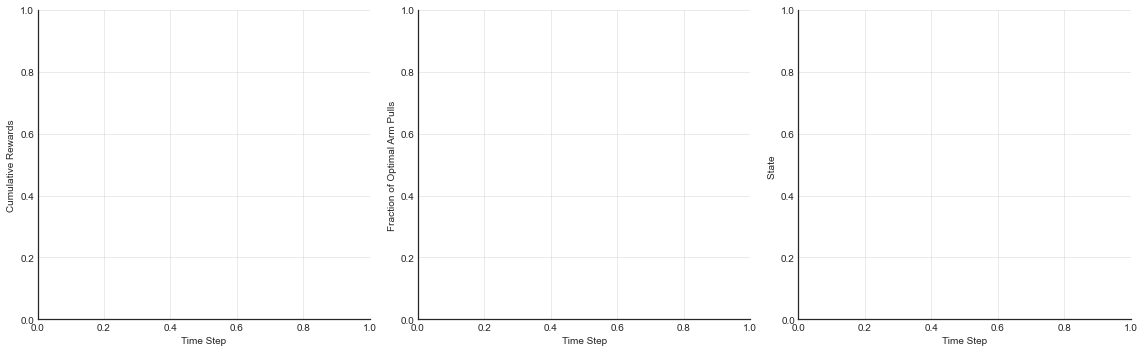

<Figure size 432x288 with 0 Axes>

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
axs = axs.flatten()

for alg, data in results.items():

    axs[0].plot(range(num_rounds), data['cumulative_rewards'], label=alg)
    axs[1].plot(range(num_rounds), data['cumulative_pulls'], label=alg)

    # Plot the state feature over time
    axs[2].plot(range(num_rounds + 1), data['states'], label=alg)


axs[0].set_ylabel("Cumulative Rewards")
axs[0].legend()

axs[1].set_ylabel("Fraction of Optimal Arm Pulls")
axs[1].legend()

axs[2].set_ylabel("State ")
axs[2].legend()

for j in range(3):
    axs[j].set_xlabel("Time Step")
    pplot(axs[j])
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


### Questions

You can explore different scenarios and answer the following questions:

1. What would happen to the performance of different algorithms if:
   - We reduce the separation between the multiple arms? (Change it in the TRUE_REWARDS variable)
   - We increase the noise variance in rewards? (Change it in the NOISE_STD variable)
   - Noise variance estimate was wrong? (Change it in the NOISE_STD_EST variable)
   - We increase the number of rounds? (Change it in the num_rounds variable)

2. Bonus:
   - Play around with random seeds, other problem parameters like true_rewards, and delta.
   - Try to predict the impact of your changes and then verify empirically.
   - If you find something interesting, share it with us!
   - Check out the code for value iteration that computes Vstar and Hstar and play with it.

Remember to re-run the entire notebook after making changes to see the updated results. Happy coding!